# Association Rule - Level 1 & Level 2

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt

# Import Data

In [2]:
basket=pd.read_csv('Inpatient.csv')
basket

,DESYNPUF_ID,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,00013D2EFD8E45D1,7802,78820,V4501,4280,2720,4019,V4502,73300,E9330,NaN
1,00016F745862898F,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
2,00016F745862898F,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
4,00016F745862898F,3569,4019,3542,V8801,78820,2639,7840,7856,4271,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66768,FFF8B49458F9FFA7,4871,41400,27651,60000,40390,3659,NaN,NaN,NaN,NaN
66769,FFF8B49458F9FFA7,9694,2989,9663,58881,2859,5790,NaN,NaN,NaN,NaN
66770,FFFA950301FCA748,1985,3694,25000,73300,33829,4168,2859,28522,NaN,NaN
66771,FFFC880E13CA6278,1519,1977,70725,2724,5723,2639,E969,5070,7830,NaN


# Data Preprocessing

In [3]:
# Get columns
mycolumns = basket.columns
mycolumns[1:]

Index(['ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10'],
      dtype='object')

In [4]:
new_basket = basket.iloc[:,1]
for i in mycolumns[2:]:
    new_basket = pd.concat([new_basket,basket.loc[:,i]])
new_basket

0         7802
1         1970
2         6186
3        29623
4         3569
         ...  
66768      NaN
66769      NaN
66770      NaN
66771      NaN
66772      NaN
Length: 667730, dtype: object

In [5]:
# Get rid of NaN/V/E values
filter1 = (new_basket.str.isnumeric() == True)
new_basket = new_basket[filter1]


In [6]:
# Extract first 3 numbers (level 2)
new_basket.astype(str)
new_basket = new_basket.str[:3]
new_basket

0        780
1        197
2        618
3        296
4        356
        ... 
66712    250
66740    287
66757    428
66761    272
66763    414
Length: 483096, dtype: object

In [7]:
# Column name: DGNS_CD_level_2
mypd = pd.DataFrame(new_basket, columns = ['DGNS_CD_level_2'])
mypd

,DGNS_CD_level_2
0,780
1,197
2,618
3,296
4,356
...,...
66712,250
66740,287
66757,428
66761,272


In [8]:
#Change type to integer
mypd['DGNS_CD_level_2']=mypd['DGNS_CD_level_2'].astype(int)

In [9]:
# Level 1:
mypd.loc[(mypd.DGNS_CD_level_2>=1) & (mypd.DGNS_CD_level_2 <=139), 'DGNS_CD_level_1']=1
mypd.loc[(mypd.DGNS_CD_level_2>=140) & (mypd.DGNS_CD_level_2 <=239), 'DGNS_CD_level_1']=2
mypd.loc[(mypd.DGNS_CD_level_2>=240) & (mypd.DGNS_CD_level_2 <=279), 'DGNS_CD_level_1']=3
mypd.loc[(mypd.DGNS_CD_level_2>=280) & (mypd.DGNS_CD_level_2 <=289), 'DGNS_CD_level_1']=4
mypd.loc[(mypd.DGNS_CD_level_2>=290) & (mypd.DGNS_CD_level_2 <=319), 'DGNS_CD_level_1']=5
mypd.loc[(mypd.DGNS_CD_level_2>=320) & (mypd.DGNS_CD_level_2 <=389), 'DGNS_CD_level_1']=6
mypd.loc[(mypd.DGNS_CD_level_2>=390) & (mypd.DGNS_CD_level_2 <=459), 'DGNS_CD_level_1']=7
mypd.loc[(mypd.DGNS_CD_level_2>=460) & (mypd.DGNS_CD_level_2 <=519), 'DGNS_CD_level_1']=8
mypd.loc[(mypd.DGNS_CD_level_2>=520) & (mypd.DGNS_CD_level_2 <=579), 'DGNS_CD_level_1']=9
mypd.loc[(mypd.DGNS_CD_level_2>=580) & (mypd.DGNS_CD_level_2 <=629), 'DGNS_CD_level_1']=10
mypd.loc[(mypd.DGNS_CD_level_2>=630) & (mypd.DGNS_CD_level_2 <=679), 'DGNS_CD_level_1']=11
mypd.loc[(mypd.DGNS_CD_level_2>=680) & (mypd.DGNS_CD_level_2 <=709), 'DGNS_CD_level_1']=12
mypd.loc[(mypd.DGNS_CD_level_2>=710) & (mypd.DGNS_CD_level_2 <=739), 'DGNS_CD_level_1']=13
mypd.loc[(mypd.DGNS_CD_level_2>=740) & (mypd.DGNS_CD_level_2 <=759), 'DGNS_CD_level_1']=14
mypd.loc[(mypd.DGNS_CD_level_2>=760) & (mypd.DGNS_CD_level_2 <=779), 'DGNS_CD_level_1']=15
mypd.loc[(mypd.DGNS_CD_level_2>=780) & (mypd.DGNS_CD_level_2 <=799), 'DGNS_CD_level_1']=16
mypd.loc[(mypd.DGNS_CD_level_2>=800) & (mypd.DGNS_CD_level_2 <=999), 'DGNS_CD_level_1']=17

mypd['DGNS_CD_level_1']=mypd['DGNS_CD_level_1'].astype(int)
mypd

,DGNS_CD_level_2,DGNS_CD_level_1
0,780,16
1,197,2
2,618,10
3,296,5
4,356,6
...,...,...
66712,250,3
66740,287,4
66757,428,7
66761,272,3


In [11]:
# add column of 1s
mypd["Count"] = 1

In [12]:
mypd.head()

,DGNS_CD_level_2,DGNS_CD_level_1,Count
0,780,16,1
1,197,2,1
2,618,10,1
3,296,5,1
4,356,6,1


In [13]:
# Transfer the dataset to 0 and 1s
AR_basket = mypd.pivot_table(index = mypd.index, columns="DGNS_CD_level_1", values="Count", aggfunc="sum", fill_value = 0)
AR_basket

DGNS_CD_level_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,2,0
1,0,2,2,0,0,0,1,0,0,2,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66768,0,0,1,0,0,1,2,1,0,1,0,0,0,0,0,0,0
66769,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,2
66770,0,1,1,2,0,2,1,0,0,0,0,0,1,0,0,0,0
66771,0,2,2,0,0,0,0,1,1,0,0,1,0,0,0,1,0


In [14]:
# As long as the value is larger than 0, assign it to 1
AR_basket[AR_basket>0] = 1

# <font color='red'>LEVEL 1</font>

# Most Frequent Itemsets

In [15]:
# Mine the most frequent itemsets
frequent_itemsets = apriori(AR_basket, min_support=0.3, use_colnames=True)
frequent_itemsets.sort_values(by= 'support', ascending=False)

,support,itemsets
3,0.844633,(7)
0,0.691844,(3)
8,0.590165,"(3, 7)"
4,0.409235,(8)
6,0.402714,(10)
7,0.378621,(16)
5,0.356447,(9)
9,0.349760,"(8, 7)"
10,0.343913,"(10, 7)"
1,0.324258,(5)


In [16]:
frequent_disease=frequent_itemsets.sort_values(by= 'support', ascending=False).head(10)
frequent_disease['itemsets'].str

# convert frozensets to list
frequent_disease['disease']=[list(x) for x in frequent_disease['itemsets']]

# convert list to string
frequent_disease['ICD_code'] = [','.join(map(str, l)) for l in frequent_disease['disease']]

In [17]:
# Add text as column, so it's more readable
disease_text={'1':'Infectious And Parasitic Disease',
        '2':'Neoplasms',
        '3':'Nutritional/Metabolic Disease',
        '4':'Diseases Of The Blood And Blood-Forming Organs',
        '5':'Mental Disorders',
        '6':'Diseases Of The Nervous System And Sense Organs',
        '7':'Diseases Of The Circulatory System',
        '8':'Diseases Of The Respiratory System',
        '9':'Diseases Of The Digestive System',
        '10':'Diseases Of The Genitourinary System',
        '11':'Complications Of Pregnancy, Childbirth, And The Puerperium',
        '12':'Diseases Of The Skin And Subcutaneous Tissue',
        '13': 'Diseases Of The Musculoskeletal System And Connective Tissue',
        '14':'Congenital Anomalies',
        '15':'Certain Conditions Originating In The Perinatal Period',
        '16':'Symptoms, Signs, And Ill-Defined Conditions',
        '17':'Injury And Poisoning'}

frequent_disease['disease_text']=frequent_disease['ICD_code'].map(disease_text)
#frequent_disease["disease_text"].fillna("Combined", inplace = True) 

frequent_disease['disease_text'][8]='Ciculatory+metabolic disease'


/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Frequency')

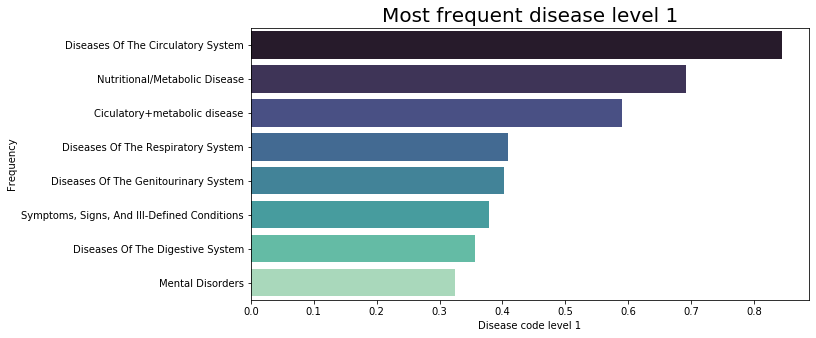

In [18]:
# Plot the most frequent disease code in level 1
import seaborn as sns
plt.figure(figsize=(10,5)) 
sns.barplot(x="support", y='disease_text',
            data=frequent_disease, 
            palette="mako", 
            estimator=sum)
plt.title("Most frequent disease level 1", fontsize=20) 
plt.xlabel("Disease code level 1", fontsize=10) 
plt.ylabel("Frequency", fontsize=10)

# Level 1 result:

In [19]:
# by support
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)
rules.sort_values(by = "support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(7),0.691844,0.844633,0.590165,0.853032,1.009944,0.005811,1.057148
1,(7),(3),0.844633,0.691844,0.590165,0.698724,1.009944,0.005811,1.022835
2,(8),(7),0.409235,0.844633,0.349760,0.854667,1.011881,0.004107,1.069046
3,(7),(8),0.844633,0.409235,0.349760,0.414097,1.011881,0.004107,1.008298
4,(10),(7),0.402714,0.844633,0.343913,0.853989,1.011077,0.003768,1.064080
5,(7),(10),0.844633,0.402714,0.343913,0.407175,1.011077,0.003768,1.007525
6,(16),(7),0.378621,0.844633,0.317436,0.838402,0.992623,-0.002359,0.961442
7,(7),(16),0.844633,0.378621,0.317436,0.375828,0.992623,-0.002359,0.995525


In [20]:
# level 1 by confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
#rules
rules.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(8),(7),0.409235,0.844633,0.349760,0.854667,1.011881,0.004107,1.069046
4,(10),(7),0.402714,0.844633,0.343913,0.853989,1.011077,0.003768,1.064080
0,(3),(7),0.691844,0.844633,0.590165,0.853032,1.009944,0.005811,1.057148
6,(16),(7),0.378621,0.844633,0.317436,0.838402,0.992623,-0.002359,0.961442
1,(7),(3),0.844633,0.691844,0.590165,0.698724,1.009944,0.005811,1.022835
3,(7),(8),0.844633,0.409235,0.349760,0.414097,1.011881,0.004107,1.008298
5,(7),(10),0.844633,0.402714,0.343913,0.407175,1.011077,0.003768,1.007525
7,(7),(16),0.844633,0.378621,0.317436,0.375828,0.992623,-0.002359,0.995525


In [21]:
# level 1 by lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules.sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(8),(7),0.409235,0.844633,0.349760,0.854667,1.011881,0.004107,1.069046
3,(7),(8),0.844633,0.409235,0.349760,0.414097,1.011881,0.004107,1.008298
4,(10),(7),0.402714,0.844633,0.343913,0.853989,1.011077,0.003768,1.064080
5,(7),(10),0.844633,0.402714,0.343913,0.407175,1.011077,0.003768,1.007525
0,(3),(7),0.691844,0.844633,0.590165,0.853032,1.009944,0.005811,1.057148
1,(7),(3),0.844633,0.691844,0.590165,0.698724,1.009944,0.005811,1.022835
6,(16),(7),0.378621,0.844633,0.317436,0.838402,0.992623,-0.002359,0.961442
7,(7),(16),0.844633,0.378621,0.317436,0.375828,0.992623,-0.002359,0.995525


#  <font color='red'>LEVEL 2</font>

In [22]:
AR_basket_2 = mypd.pivot_table(index = mypd.index, columns="DGNS_CD_level_2", values="Count", aggfunc="sum", fill_value = 0)
AR_basket_2

DGNS_CD_level_2,30,31,35,39,42,49,59,71,74,75,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
AR_basket_2[AR_basket_2>0] = 1

# Most frequent itemsets level 2

In [24]:
# We first set the threshold to be 0.05, but couldn't find any AR related to depression.
# Then we reduced it to 0.001 and got the results. 
# FPGROWTH is similar to Apriori, but a lot faster. 
frequent_itemsets_2 = fpgrowth(AR_basket_2, min_support=0.001, use_colnames=True)
frequent_itemsets_2.sort_values(by= 'support', ascending=False)

,support,itemsets
0,0.360270,(401)
44,0.254918,(414)
6,0.249115,(276)
33,0.247571,(250)
1,0.228846,(272)
...,...,...
987,0.001004,"(584, 250, 403, 414)"
7058,0.001004,"(682, 331)"
9306,0.001004,"(997, 389)"
4554,0.001004,"(272, 433, 530)"


In [25]:
len(frequent_itemsets_2)

9447

In [26]:
frequent_disease_2=frequent_itemsets_2.sort_values(by= 'support', ascending=False).head(10)
frequent_disease_2['itemsets'].str

# convert frozensets to list
frequent_disease_2['disease']=[list(x) for x in frequent_disease_2['itemsets']]

# convert list to string
frequent_disease_2['ICD_code'] = [','.join(map(str, l)) for l in frequent_disease_2['disease']]

In [27]:
# Add text as column, so it's more readable
disease_text_2={'401':'hypertension',
        '414':'chronic ischemic heart disease',
        '276':'Disorders of fluid electrolyte and acid-base balance',
        '250':'Diabetes mellitus',
        '272':'Disorders of lipoid metabolism',
        '427':'Cardiac dysrhythmias',
        '428':'Heart failure',
        '285':'Other and unspecified anemias',
        '599':'Disorder of urinary tract',
        '530':'Diseases of esophagus'}

frequent_disease_2['disease_text']=frequent_disease_2['ICD_code'].map(disease_text_2)
frequent_disease_2

,support,itemsets,disease,ICD_code,disease_text
0,0.360270,(401),[401],401,hypertension
44,0.254918,(414),[414],414,chronic ischemic heart disease
6,0.249115,(276),[276],276,Disorders of fluid electrolyte and acid-base b...
33,0.247571,(250),[250],250,Diabetes mellitus
1,0.228846,(272),[272],272,Disorders of lipoid metabolism
21,0.228801,(427),[427],427,Cardiac dysrhythmias
2,0.222339,(428),[428],428,Heart failure
58,0.153478,(285),[285],285,Other and unspecified anemias
71,0.141904,(599),[599],599,Disorder of urinary tract
40,0.137976,(530),[530],530,Diseases of esophagus


Text(0, 0.5, 'Frequency')

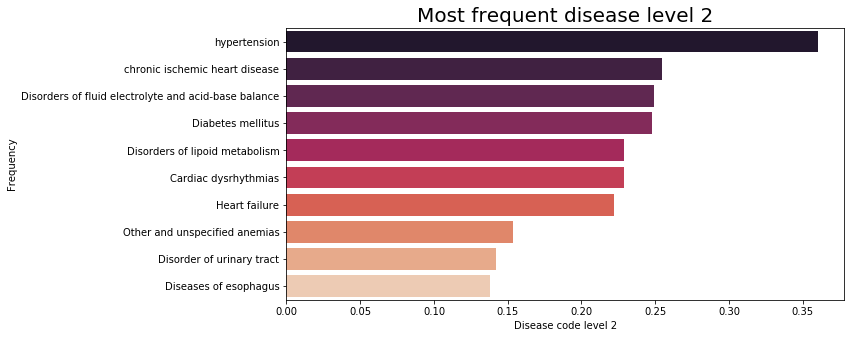

In [28]:
# Plot the most frequent disease code in level 2
import seaborn as sns
plt.figure(figsize=(10,5)) 
sns.barplot(x="support", y='disease_text',
            data=frequent_disease_2, 
            palette="rocket", 
            estimator=sum)
plt.title("Most frequent disease level 2", fontsize=20) 
plt.xlabel("Disease code level 2", fontsize=10) 
plt.ylabel("Frequency", fontsize=10)

# Level 2 result

In [29]:
# by support
rules_2 = association_rules(frequent_itemsets_2, metric="support", min_threshold=0.01)
rules_2.sort_values(by = "support", ascending = False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(272),(401),0.228846,0.360270,0.091409,0.399437,1.108715,0.008963,1.065217
1,(401),(272),0.360270,0.228846,0.091409,0.253725,1.108715,0.008963,1.033337
2,(272),(276),0.228846,0.249115,0.046207,0.201913,0.810520,-0.010802,0.940856
3,(276),(272),0.249115,0.228846,0.046207,0.185484,0.810520,-0.010802,0.946764
4,(272),(414),0.228846,0.254918,0.066312,0.289767,1.136708,0.007975,1.049067
...,...,...,...,...,...,...,...,...,...
923,(401),(416),0.360270,0.031514,0.010255,0.028464,0.903224,-0.001099,0.996861
924,(560),(401),0.034378,0.360270,0.011049,0.321413,0.892145,-0.001336,0.942739
925,(401),(560),0.360270,0.034378,0.011049,0.030670,0.892145,-0.001336,0.996175
926,(560),(276),0.034378,0.249115,0.010600,0.308330,1.237698,0.002036,1.085611


In [30]:
# level 2 by confidence
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.01)
rules_2.sort_values(by = "confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27082,"(411, 413)",(414),0.001889,0.254918,0.001439,0.761905,2.988828,0.000958,3.129346
13081,"(784, 342)",(434),0.001619,0.025847,0.001109,0.685185,26.509195,0.001068,3.094368
14524,"(411, 412)",(414),0.002069,0.254918,0.001349,0.652174,2.558372,0.000822,2.142112
14379,"(272, 250, 411)",(414),0.002279,0.254918,0.001454,0.638158,2.503389,0.000873,2.059137
14484,"(272, 411, 427)",(414),0.002444,0.254918,0.001484,0.607362,2.382582,0.000861,1.897632


In [31]:
# level 2 by lift
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.01)
rules_2.sort_values(by = "lift", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46229,(618),(625),0.004558,0.003238,0.001094,0.240132,74.151742,0.001080,1.311756
46228,(625),(618),0.003238,0.004558,0.001094,0.337963,74.151742,0.001080,1.503605
15323,"(784, 342)",(434),0.001619,0.025847,0.001109,0.685185,26.509195,0.001068,3.094368
15326,(434),"(784, 342)",0.025847,0.001619,0.001109,0.042923,26.509195,0.001068,1.043157
15322,"(784, 434)",(342),0.004588,0.010810,0.001109,0.241830,22.371797,0.001060,1.304708


### <font color='red'>Update after the presentaion:</font>
After reduced support threshold to 0.001, We got the following AR related depressive disorder(ICD 311)

In [32]:
# antecedents=depressive disorder
depression_df=rules_2[rules_2['antecedents']=={311}]

# Show top 5 AR
depression_df.sort_values(by='lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30775,(311),(820),0.050525,0.020690,0.001649,0.032641,1.577646,0.000604,1.012355
35906,(311),(719),0.050525,0.013148,0.001034,0.020475,1.557204,0.000370,1.007479
27045,(311),"(530, 715)",0.050525,0.017376,0.001349,0.026706,1.536933,0.000471,1.009586
26961,(311),"(530, 780)",0.050525,0.013043,0.001004,0.019881,1.524233,0.000345,1.006977
21843,(311),(781),0.050525,0.018651,0.001364,0.027003,1.447828,0.000422,1.008584


In [33]:
# consequent=depressive disorder
depression_df_2=rules_2[rules_2['consequents']=={311}]

# show top 5 AR
depression_df_2.sort_values(by='lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30774,(820),(311),0.020690,0.050525,0.001649,0.079710,1.577646,0.000604,1.031713
35907,(719),(311),0.013148,0.050525,0.001034,0.078677,1.557204,0.000370,1.030557
27040,"(530, 715)",(311),0.017376,0.050525,0.001349,0.077653,1.536933,0.000471,1.029412
26956,"(530, 780)",(311),0.013043,0.050525,0.001004,0.077011,1.524233,0.000345,1.028697
21842,(781),(311),0.018651,0.050525,0.001364,0.073151,1.447828,0.000422,1.024412
